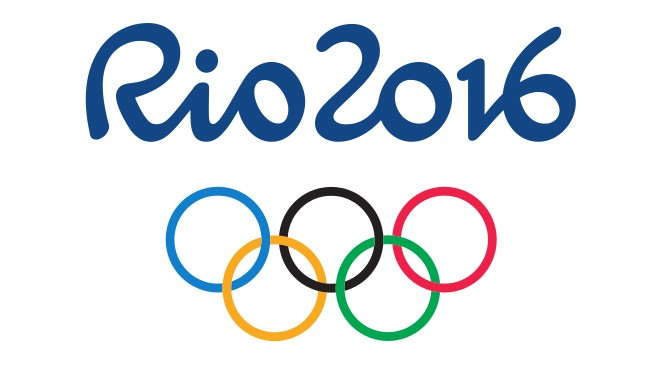

Through this notebook, I tried to realize relevant visualizations from Rio 2016 Olympic Games dataset. The visualizations are realized with the help of the bookstore Plotly ([see documentation](https://plotly.com/python/#basic-charts)).

Don't hesitate to give me your feedback! I welcome any ideas for improvement.

### Libraries importations

In [ ]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Data importations

In [ ]:
import os
os.listdir("../input/olympic-games")

In [ ]:

athletes = pd.read_csv('../input/olympic-games/athletes.csv')
countries = pd.read_csv('../input/olympic-games/countries.csv')
events = pd.read_csv('../input/olympic-games/events.csv',encoding='ISO-8859-1')

# 1. Cleanning datasets

## 1.1 Athletes dataset

In [ ]:
athletes.head()

In [ ]:
athletes = athletes.drop('id',axis=1)

In [ ]:
athletes.shape

#### Checking NaNs

In [ ]:
athletes.isna().sum()

#### Filling 'dob' variable

In [ ]:
athletes[athletes.dob.isna()]

According to Wikipedia, Pavel Sozykin was born the 12/25/87. Let's fill this !

In [ ]:
athletes['dob'] = athletes['dob'].fillna("12/25/87")

#### Filling weight and height with median by sports and sexe

In [ ]:
#height
athletes['height'] = athletes.groupby(["sport","sex"])["height"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
#weight
athletes['weight'] = athletes.groupby(["sport","sex"])["weight"].transform(
    lambda x: x.fillna(x.median()))

We still have NaN values for boxers. We are going to give them the median value of all sports by sex. This is not the best solution. We will have to take this into account for the rest of the analysis.

In [ ]:
#weight boxing
athletes['weight'] = athletes.groupby(["sex"])["weight"].transform(
    lambda x: x.fillna(x.median()))

#### Checking types

In [ ]:
athletes.dtypes

#### Create age variable (at the date of the Olympics : august 16, 2016)

In [ ]:
#creation birth year, month and day variables

#year
athletes['birth_year'] = athletes['dob'].str.strip().str[-2:].astype(float)
athletes['birth_year'] = athletes['birth_year'].apply(lambda x: (x + 2000) if (x < 16) else (x + 1900))

#month
athletes['birth_month'] = athletes['dob'].str.strip().str[:2]
athletes['birth_month'] = athletes['birth_month'].str.replace("/", "").astype(float)

#day
athletes['birth_day'] = athletes['dob'].str.strip().str[-5:-3]
athletes['birth_day'] = athletes['birth_day'].str.replace("/", "").astype(float)

In [ ]:
#calculating age
athletes['age'] = 2016 - athletes['birth_year']
athletes.loc[athletes['birth_month'] > 8, 'age'] = 2015 - athletes['birth_year']
athletes.loc[(athletes['birth_month'] == 8) & (athletes['birth_day'] > 15), 'age'] = 2015 - athletes['birth_year'] 

#### Delete 'dob' variable

In [ ]:
athletes = athletes.drop('dob', axis=1)
athletes = athletes.drop('birth_year', axis=1)
athletes = athletes.drop('birth_month', axis=1)
athletes = athletes.drop('birth_day', axis=1)

#### Create 'total_medals' variable

In [ ]:
athletes['total_medals'] = athletes['gold'] + athletes['silver'] + athletes['bronze']

## 1.2 Countries dataset

In [ ]:
countries.head()

### Fill NaNs

In [ ]:
countries.isna().sum()

In [ ]:
countries[countries.population.isna() | countries.gdp_per_capita.isna()]

#### Thanks to internet, we can fill all these NaNs

In [ ]:
#### Filling Nans population thanks to internet info
countries.loc[countries['code'] == 'COK','population'] = float(17459)
countries.loc[countries['code'] == 'ERI','population'] = float(3214000) #number from 2011
countries.loc[countries['code'] == 'PLE','population'] = float(4367000)
countries.loc[countries['code'] == 'TPE','population'] = float(23618200)

#Filling NaNs gdp thansks to internet info
countries.loc[countries['code'] == 'ASA','gdp_per_capita'] = float(11696)
countries.loc[countries['code'] == 'AND','gdp_per_capita'] = float(37224)
countries.loc[countries['code'] == 'ARU','gdp_per_capita'] = float(25239)
countries.loc[countries['code'] == 'BER','gdp_per_capita'] = float(106886)
countries.loc[countries['code'] == 'IVB','gdp_per_capita'] = float(43818)
countries.loc[countries['code'] == 'CAY','gdp_per_capita'] = float(78296)
countries.loc[countries['code'] == 'COK','gdp_per_capita'] = float(17682)
countries.loc[countries['code'] == 'CUB','gdp_per_capita'] = float(8060)
countries.loc[countries['code'] == 'ERI','gdp_per_capita'] = float(447)
countries.loc[countries['code'] == 'GUM','gdp_per_capita'] = float(35562)
countries.loc[countries['code'] == 'IRI','gdp_per_capita'] = float(5265)
countries.loc[countries['code'] == 'PRK','gdp_per_capita'] = float(663)
countries.loc[countries['code'] == 'LBA','gdp_per_capita'] = float(4035)
countries.loc[countries['code'] == 'LIE','gdp_per_capita'] = float(165028)
countries.loc[countries['code'] == 'MTN','gdp_per_capita'] = float(1123)
countries.loc[countries['code'] == 'PLE','gdp_per_capita'] = float(3074)
countries.loc[countries['code'] == 'PNG','gdp_per_capita'] = float(2509)
countries.loc[countries['code'] == 'PUR','gdp_per_capita'] = float(30628)
countries.loc[countries['code'] == 'SMR','gdp_per_capita'] = float(46692)
countries.loc[countries['code'] == 'SYR','gdp_per_capita'] = float(709)
countries.loc[countries['code'] == 'TPE','gdp_per_capita'] = float(23071)
countries.loc[countries['code'] == 'VEN','gdp_per_capita'] = float(9092)
countries.loc[countries['code'] == 'ISV','gdp_per_capita'] = float(35931)

#### Adding the number of medals and athletes per countries

In [ ]:
#number of gold medal
nb_gold_per_countries = athletes.groupby('nationality')['gold'].agg('sum').rename_axis('code').to_frame('gold')
countries = pd.merge(countries,nb_gold_per_countries,on="code")

#number of silver medals
nb_silver_per_countries = athletes.groupby('nationality')['silver'].agg('sum').rename_axis('code').to_frame('silver')
countries = pd.merge(countries,nb_silver_per_countries,on="code")

#number of bronze medals
nb_bronze_per_countries = athletes.groupby('nationality')['bronze'].agg('sum').rename_axis('code').to_frame('bronze')
countries = pd.merge(countries,nb_bronze_per_countries,on="code")

#total medals 
nb_medals_per_countries = athletes.groupby('nationality')['total_medals'].agg('sum').rename_axis('code').to_frame('total_medals')
countries = pd.merge(countries,nb_medals_per_countries,on="code")

#number of female athletes
nb_female_athletes_per_countries = athletes[athletes['sex'] == 'female']['nationality'].value_counts().rename_axis('code').to_frame('nb_female_athletes')
countries = pd.merge(countries,nb_female_athletes_per_countries,on="code")

#number of male athletes
nb_male_athletes_per_countries = athletes[athletes['sex'] == 'male']['nationality'].value_counts().rename_axis('code').to_frame('nb_male_athletes')
countries = pd.merge(countries,nb_male_athletes_per_countries,on="code")

#number of athletes
nb_athletes_per_countries = athletes['nationality'].value_counts().rename_axis('code').to_frame('nb_athletes')
countries = pd.merge(countries,nb_athletes_per_countries,on="code")

In [ ]:
countries.head()

## 1.3 Events dataset

In [ ]:
events.head()

In [ ]:
events = events.drop('id',axis=1)

## 1.4 Creating Sports dataset

### Creating values

In [ ]:
#number competitions
sports = events['sport'].value_counts().rename_axis('sport').to_frame('nb_competitions')

#number of female athletes
nb_female_athletes_per_sports = athletes[athletes['sex'] == 'female']['sport'].value_counts().rename_axis('sport').to_frame('nb_female_athletes')
sports = pd.merge(sports,nb_female_athletes_per_sports,on="sport")

#number of male athletes
nb_male_athletes_per_sports = athletes[athletes['sex'] == 'male']['sport'].value_counts().rename_axis('sport').to_frame('nb_male_athletes')
sports = pd.merge(sports,nb_male_athletes_per_sports,on="sport")

#number nb athletes
nb_athletes_per_sports = athletes['sport'].value_counts().rename_axis('sport').to_frame('nb_athletes')
sports = pd.merge(sports,nb_athletes_per_sports,on="sport")

#gold medals 
nb_gold_per_sports = athletes.groupby('sport')['gold'].agg('sum').rename_axis('sport').to_frame('gold')
sports = pd.merge(sports,nb_gold_per_sports,on="sport")

#silver medals 
nb_silver_per_sports = athletes.groupby('sport')['silver'].agg('sum').rename_axis('sport').to_frame('silver')
sports = pd.merge(sports,nb_silver_per_sports,on="sport")

#bronze medals 
nb_bronze_per_sports = athletes.groupby('sport')['bronze'].agg('sum').rename_axis('sport').to_frame('bronze')
sports = pd.merge(sports,nb_bronze_per_sports,on="sport")

#total medals 
nb_medals_per_sports = athletes.groupby('sport')['total_medals'].agg('sum').rename_axis('sport').to_frame('total_medals')
sports = pd.merge(sports,nb_medals_per_sports,on="sport")

In [ ]:
sports.head()

**Attention:** here, the number of medals corresponds to the number of medals distributed to athletes and not to the number of medals won by a country in a competition. It is therefore normal for team sports/relay competitions to have a large number of medals because all athletes on a winning team will have their own medal. 

# 2. Data exploration and visualizations

## 2.1 Athletes characteristics

### Women athletes description

In [ ]:
athletes[athletes['sex'] == 'female'].describe()

### Men athletes description

In [ ]:
athletes[athletes['sex'] == 'male'].describe()

### Age boxplot per sports

In [ ]:
fig = px.box(athletes, x="sport", y="age",color_discrete_sequence=['darkcyan'])
fig.show()

We can notice that some disciplines, such as equestrian or shooting, allow high level athletes to have a long career. On the other hand, careers in other disciplines such as gymnastics or weightlifting stop at a very young age.

### Age boxplot per sex

In [ ]:
fig = px.box(athletes, x="sex", y="age",color='sex',color_discrete_sequence=['darkcyan','lightcoral'])
fig.show()

The median age of the athletes is roughly equivalent between men (26) and women (25).

### Height and weight per sex

In [ ]:
color_discrete_map = {'female': 'lightcoral', 'male': 'darkcyan'}
for sport in sports.index:
    fig = px.scatter(athletes[athletes['sport'] == sport], x="weight", y="height", color="sex",title="Heidh and weight per sex for {}".format(sport),color_discrete_map=color_discrete_map)
    fig.show()

### Sex distribution per sports

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

fig = go.Figure()

# Make traces for graph
fig.add_trace(go.Bar(x=sports.index, y=sports.nb_female_athletes, xaxis='x2', yaxis='y2',
                marker=dict(color='lightcoral'),
                name='female'))
fig.add_trace(go.Bar(x=sports.index, y=sports.nb_male_athletes, xaxis='x2', yaxis='y2',
                marker=dict(color='darkcyan'),
                name='male'))

fig.update_layout(
    title_text='Sex distribution per sports', # title of plot
)
# Plot!
fig.show()

It is interesting to see that the number of female athletes is lower than the number of male athletes in all categories. Gymnastics is an exception. 

## 2.2 Medals distribution

### Medals distribution according to age

In [ ]:
fig = px.histogram(athletes, x='age',y="total_medals", color_discrete_sequence=["darkcyan"],title='Medals distribution per age').update_xaxes(categoryorder="total descending")
fig.show()

This distribution around athletes between 20 and 30 years old is not surprising after viewing our age boxplots. On the other hand, it is interesting to see that senior athletes, although few in number, also win medals!

### Number of medals per sports

In [ ]:
fig = px.histogram(sports, x=sports.index,y="total_medals", color_discrete_sequence=["darkcyan"],title='total medals per sports').update_xaxes(categoryorder="total descending")
fig.show()

Some sports have more medals to offer. This can be explained by : 
* A variety of disciplines (e.g. paul vault, sprint, throwing etc. for athletics)
* Relay/team competitions, which therefore offers a medal to each member (but on the medal table, a team win counts as one).

### Medals distribution per countries

In [ ]:
#Construction of a specific dataframe for this plot
medals_types = ['bronze','silver','gold']
medals = pd.DataFrame()

for medal in medals_types :
        
    df = pd.DataFrame(columns=['country','code','medal'])
    df[['country','code']] = countries[['country','code']]
    df['medal'] = str(medal)
    nb_medals_per_countries = athletes.groupby('nationality')[medal].agg('sum').rename_axis('code').to_frame('count')
    df = pd.merge(df,nb_medals_per_countries,on="code")
    medals = pd.concat([medals,df],ignore_index=True)
    
#Bart chart construction
fig = px.bar(medals[medals['count'] >0], x="country", y="count", color="medal",color_discrete_sequence=['darkorange', 'silver', 'gold'], title="Number of Olympic medals per countries",
            width=2000,height=700).update_xaxes(categoryorder="total descending")
fig.show()

Not surprisingly, the United States is far ahead from other countries. 
France ranks 6th, which is really not good! I think that this score is mainly due to our main disciplines: judo, equestrian and swimming.
Let's check it out!

### Medals distribution per Sports

In [ ]:
medals_types = ['bronze','silver','gold']
medals = pd.DataFrame()

for sport in sports.index : 
    
    for medal in medals_types :
        
        df = pd.DataFrame(columns=['country','code','sport','medal'])
        df[['country','code']] = countries[['country','code']]
        df['sport'] = str(sport)
        df['medal'] = str(medal)
        nb_medals_per_sports_countries = athletes[athletes['sport'] == sport].groupby('nationality')[medal].agg('sum').rename_axis('code').to_frame('count')
        df = pd.merge(df,nb_medals_per_sports_countries,on="code")
        medals = pd.concat([medals,df],ignore_index=True)

#Bart chart construction
for sport in sports.index : 
    fig = px.bar(medals[(medals['count'] >0) & (medals['sport'] == sport)], x="country", y="count", color="medal",color_discrete_sequence=['darkorange', 'silver', 'gold'], title="Medals distribution for {}".format(sport)).update_xaxes(categoryorder="total descending")
    fig.show()

This visualization is very interesting! We can realize that some countries have their specialties, like China in table tennis or Jamaica in athletics! 

### TOP 10 Female Athletes

In [ ]:
top10_female = athletes[athletes['sex'] == 'female'].sort_values(by=['total_medals','gold','silver','bronze'],ascending=False)
top10_female = top10_female.reset_index()
top10_female.index +=1
top10_female = top10_female[['name','nationality','sport','sex','age','height','weight','gold','silver','bronze','total_medals']]

In [ ]:
top10_female.head(10)

### TOP 10 Male Athletes

In [ ]:
top10_male = athletes[athletes['sex'] == 'male'].sort_values(by=['total_medals','gold','silver','bronze'],ascending=False)
top10_male = top10_male.reset_index()
top10_male.index +=1
top10_male = top10_male[['name','nationality','sport','sex','age','height','weight','gold','silver','bronze','total_medals']]

In [ ]:
top10_male.head(10)

Obviously Michael Phelps is at the top of the standings It is the recordman of the number of gold medals won at the Olympic Games (23 gold medals all games combined)!

## 2.3 Results compared to gdp_per_capita

### Total medals compared to total athletes and gdp_per_capita

In [ ]:
fig = px.scatter(countries, x="gdp_per_capita", y="nb_athletes",
      size="total_medals", color="total_medals",color_continuous_scale='Cividis',
                 hover_name="country", size_max=60,range_x=[-3000,100000],title='Total medals compared to total athletes and gdp_per_capita')
fig.show()

Nothing surprising! The more athletes a country has, the more medals it gets. 

On the other hand, a high GDP per capita does not seem to be very necessary to have a large number of medals. It probably depends on sports. Unfortunately, some sports are less accessible financially, which prevents poorer countries from imposing themselves. Let's check this!

In [ ]:
#Construction of a specific dataframe for this plot
sports_gdp = pd.DataFrame()

for sport in sports.index :
        
    df = pd.DataFrame(columns=['country','code','sport'])
    df[['country','code']] = countries[['country','code']]
    df0 = countries[['code','gdp_per_capita']]
    df = pd.merge(df,df0,on="code")
    df['sport'] = str(sport)
    nb_athletes_per_countries = athletes[athletes['sport'] == sport]['nationality'].value_counts().rename_axis('code').to_frame('nb_athletes')
    df = pd.merge(df,nb_athletes_per_countries,on="code")
    nb_medals_per_countries = athletes[athletes['sport'] == sport].groupby('nationality')['total_medals'].agg('sum').rename_axis('code').to_frame('total_medals')
    df = pd.merge(df,nb_medals_per_countries,on="code")
    sports_gdp = pd.concat([sports_gdp,df],ignore_index=True)
    
#plot
for sport in sports.index:
    fig = px.scatter(sports_gdp[sports_gdp['sport'] == sport], x="gdp_per_capita", y="nb_athletes",
      size="total_medals", color="total_medals",color_continuous_scale='Cividis',
                 hover_name="country", size_max=60,range_x=[-3000,100000],title='Total medals compared to total athletes and gdp_per_capita for {}'.format(sport))
    fig.show()

As we suspected, there are many sports that are more favorable to rich countries (sailing, equestrian etc.), while some sports, like wrestling and weightlifting, seem to let poor countries dominate.